# Task : Regression problem. Main idea is find how many Drinks ?

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'./DATA/Liver Disorders/bupa.data.csv' , header= None)
df.columns = ['Mcv' , 'Alkphos' , 'Sgpt' , 'Sgot' , 'Gammagt' , 'Drinks' , 'Selector']

target_col = 'Drinks'

print(f"DF shape :{df.shape}")

df.head()

DF shape :(345, 7)


,Mcv,Alkphos,Sgpt,Sgot,Gammagt,Drinks,Selector
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2


# Summary

In [3]:
df.isna().sum()

Mcv         0
Alkphos     0
Sgpt        0
Sgot        0
Gammagt     0
Drinks      0
Selector    0
dtype: int64

In [4]:
# Total Summary

def set_frame_style(df, caption=""):
    """Helper function to set dataframe presentation style.
    """
    return df.style.background_gradient(cmap='Blues').set_caption(caption).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'Blue'),
        ('font-size', '18px'),
        ('font-weight','bold')
    ]}])

def check_data(data, title):
    cols = data.columns.to_list()
    display(set_frame_style(data[cols].head(),f'{title}: First 5 Rows Of Data'))
    display(set_frame_style(data[cols].describe(),f'{title}: Summary Statistics'))
    display(set_frame_style(data[cols].nunique().to_frame().rename({0:'Unique Value Count'}, axis=1).transpose(), f'{title}: Unique Value Counts In Each Column'))
    display(set_frame_style(data[cols].isna().sum().to_frame().transpose(), f'{title}:Columns With Nan'))
    
check_data(df, 'Train data')
print('-'*100)
# check_data(df_test, 'Test data')
# print('-'*100)
# check_data(original, 'Original data')

,Mcv,Alkphos,Sgpt,Sgot,Gammagt,Drinks,Selector
0,85,92,45,27,31,0.000000,1
1,85,64,59,32,23,0.000000,2
2,86,54,33,16,54,0.000000,2
3,91,78,34,24,36,0.000000,2
4,87,70,12,28,10,0.000000,2


,Mcv,Alkphos,Sgpt,Sgot,Gammagt,Drinks,Selector
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,90.159420,69.869565,30.405797,24.643478,38.284058,3.455072,1.579710
std,4.448096,18.347670,19.512309,10.064494,39.254616,3.337835,0.494322
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000,1.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000,1.000000
50%,90.000000,67.000000,26.000000,23.000000,25.000000,3.000000,2.000000
75%,93.000000,80.000000,34.000000,27.000000,46.000000,6.000000,2.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000,2.000000


,Mcv,Alkphos,Sgpt,Sgot,Gammagt,Drinks,Selector
Unique Value Count,26,78,67,47,94,16,2


,Mcv,Alkphos,Sgpt,Sgot,Gammagt,Drinks,Selector
0,0,0,0,0,0,0,0


----------------------------------------------------------------------------------------------------


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Mcv       345 non-null    int64  
 1   Alkphos   345 non-null    int64  
 2   Sgpt      345 non-null    int64  
 3   Sgot      345 non-null    int64  
 4   Gammagt   345 non-null    int64  
 5   Drinks    345 non-null    float64
 6   Selector  345 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 19.0 KB


In [6]:
num_cols = df.select_dtypes(exclude=['object','category']).columns.tolist()
cat_cols = df.select_dtypes(include=['category']).columns.tolist()

In [15]:
num_cols.remove('Selector')

In [8]:
df.Selector.value_counts()

Selector
2    200
1    145
Name: count, dtype: int64

# Train | Test Split

In [9]:
df_train = df[df.Selector == 2]
df_test = df[df.Selector == 1]

df_train = df_train.drop('Selector' , axis = 1)
df_test = df_test.drop('Selector' , axis = 1)

In [10]:
df_train

,Mcv,Alkphos,Sgpt,Sgot,Gammagt,Drinks
1,85,64,59,32,23,0.0
2,86,54,33,16,54,0.0
3,91,78,34,24,36,0.0
4,87,70,12,28,10,0.0
5,98,55,13,17,17,0.0
...,...,...,...,...,...,...
336,86,123,20,25,23,10.0
337,91,93,35,34,37,10.0
338,87,87,15,23,11,10.0
339,87,56,52,43,55,10.0


# EDA

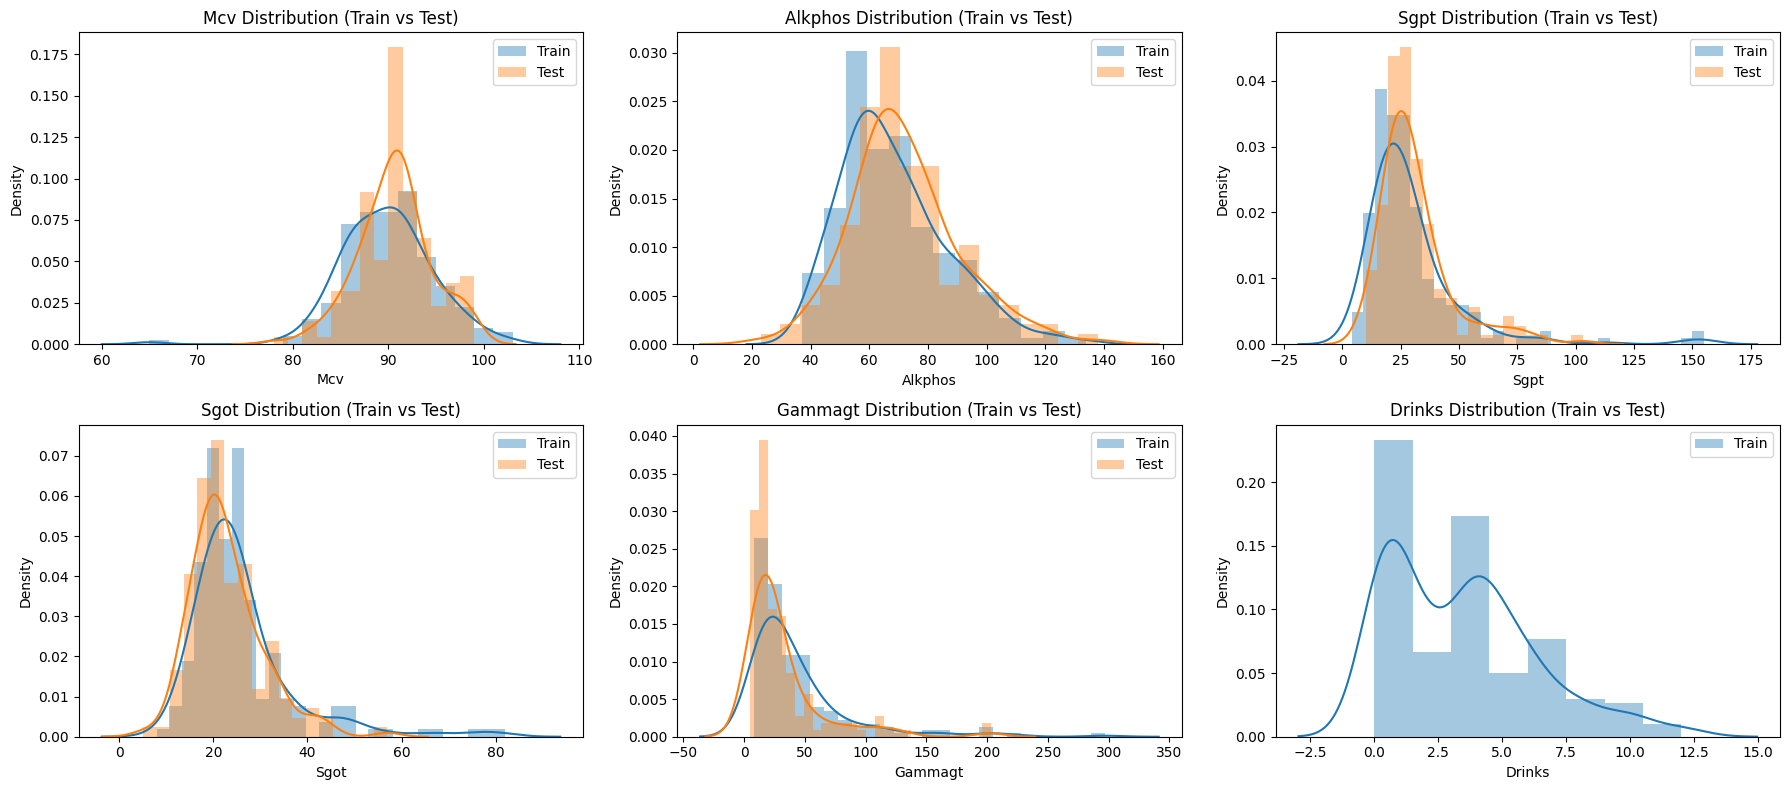

In [18]:
import warnings
warnings.filterwarnings("ignore")

def plot_histograms(df_train, df_test, target_col, n_cols=3):
    n_rows = (len(df_train.columns) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4*n_rows))
    axes = axes.flatten()

    for i, var_name in enumerate(df_train.columns.tolist()):
        if var_name != 'is_generated':
            ax = axes[i]
            sns.distplot(df_train[var_name], kde=True, ax=ax, label='Train')
            if var_name != target_col:
                sns.distplot(df_test[var_name], kde=True, ax=ax, label='Test')
            ax.set_title(f'{var_name} Distribution (Train vs Test)')
            ax.legend()

    plt.tight_layout()
    plt.show()

plot_histograms(df_train[num_cols], df_test[num_cols], target_col, n_cols=3)

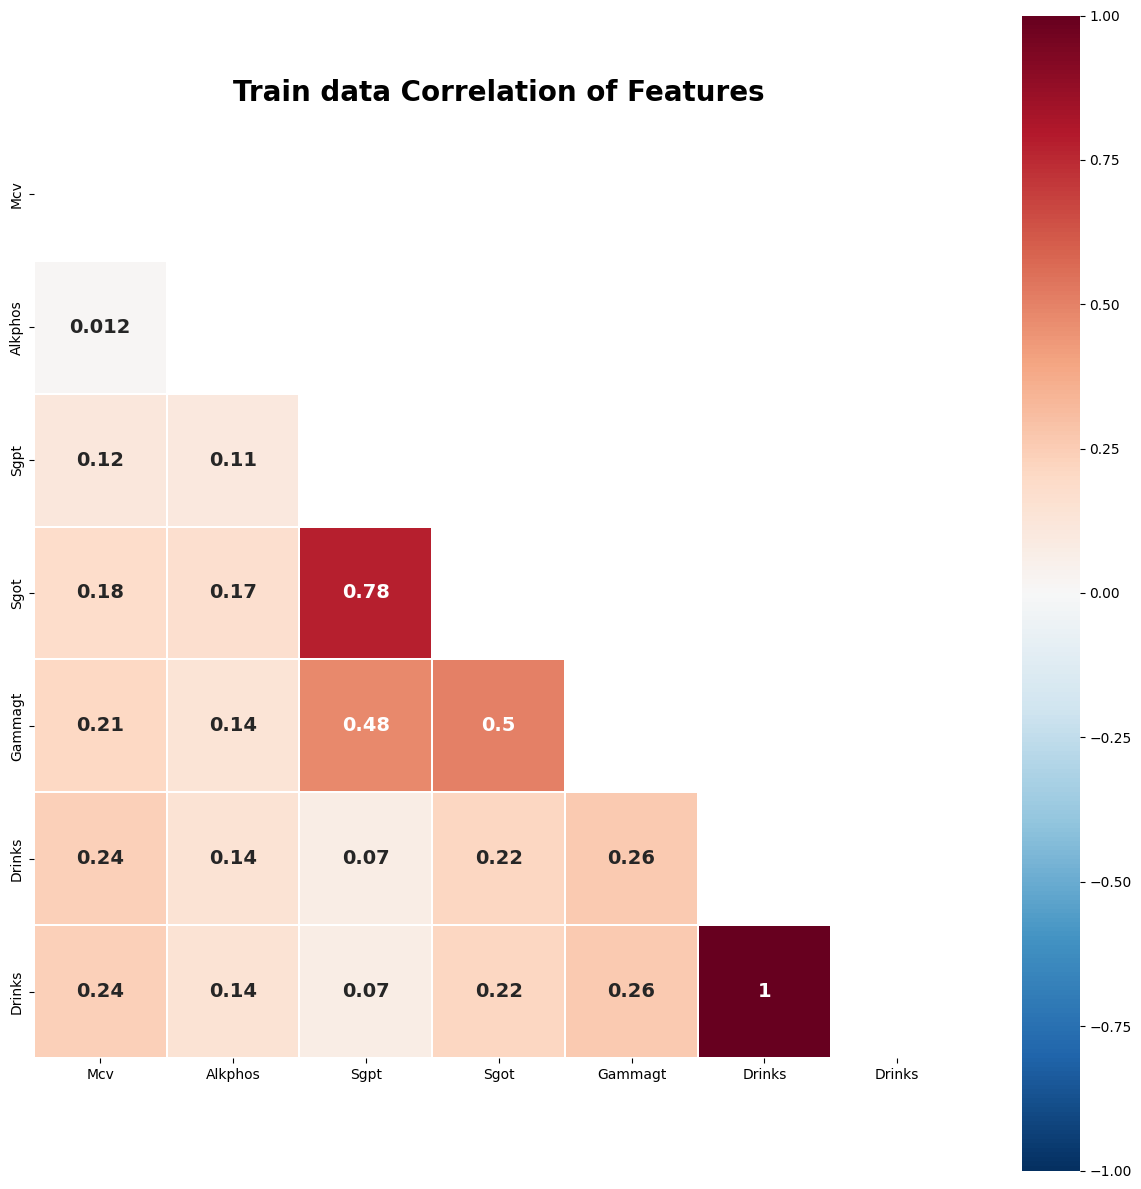

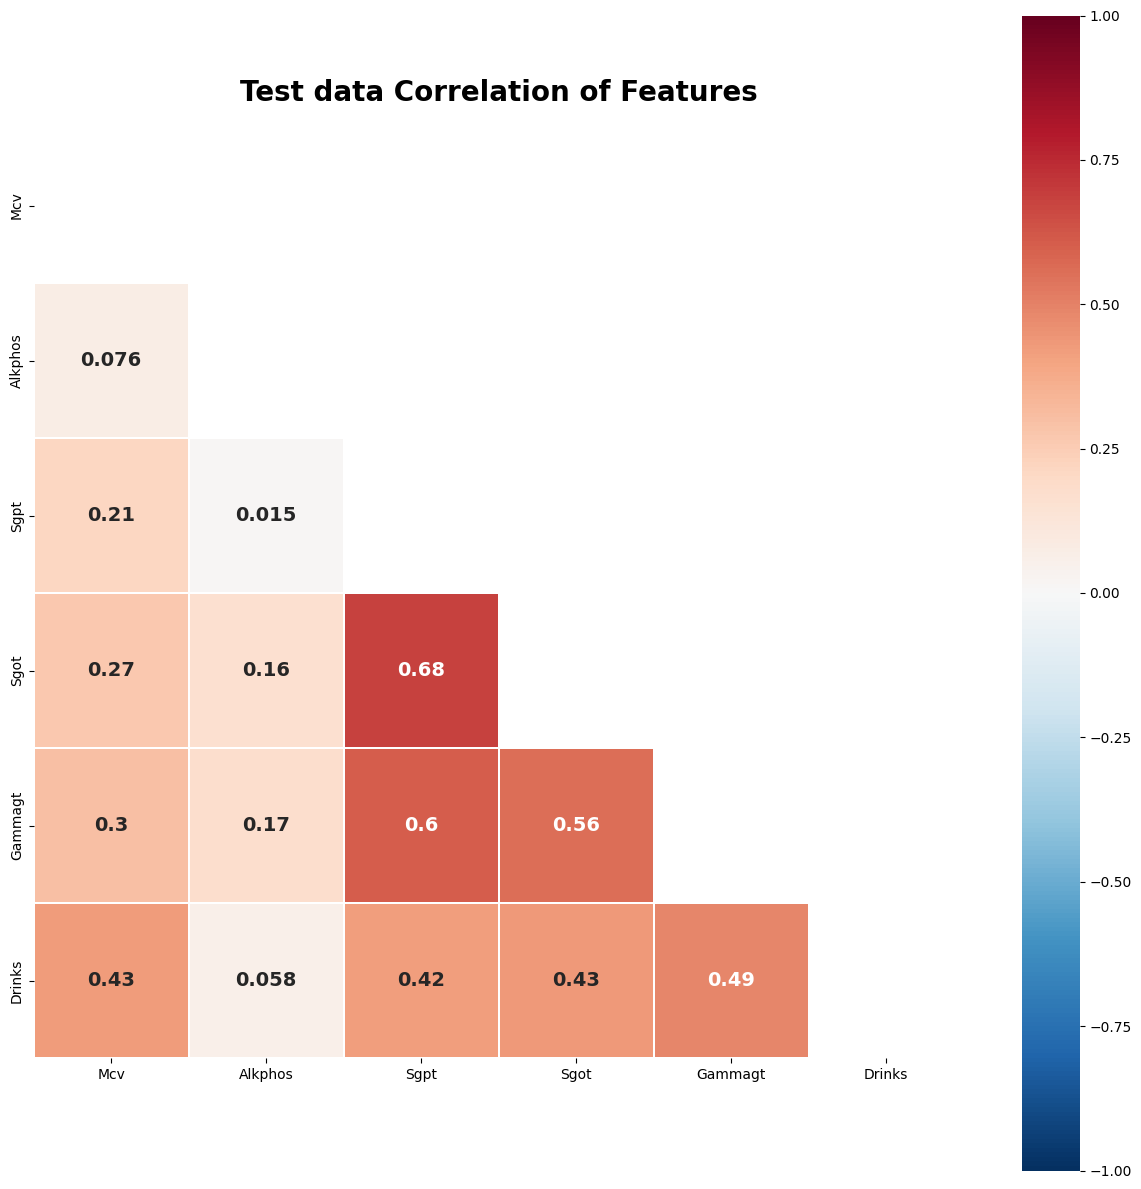

In [19]:
def plot_heatmap(df, title):
    # Create a mask for the diagonal elements
    mask = np.zeros_like(df.astype(float).corr())
    mask[np.triu_indices_from(mask)] = True

    # Set the colormap and figure size
    colormap = plt.cm.RdBu_r
    plt.figure(figsize=(15, 15))

    # Set the title and font properties
    plt.title(f'{title} Correlation of Features', fontweight='bold', y=1.02, size=20)

    # Plot the heatmap with the masked diagonal elements
    sns.heatmap(df.astype(float).corr(), linewidths=0.1, vmax=1.0, vmin=-1.0, 
                square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 14, "weight": "bold"},
                mask=mask)

plot_heatmap(df_train[num_cols+[target_col]], title='Train data')
plot_heatmap(df_test[num_cols], title='Test data')
# plot_heatmap(original[num_cols+[target_col]], title='original')

# Feature Engineering

In [ ]:
# Pass

# Functions(Utils)

In [20]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score , confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score , roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE , ADASYN
from sklearn.model_selection import cross_val_score

class fonks:
    """
    Class'ın amacı:
    - Sıkça kullanılacak fonksiyonları oluşturmak ve kolayca çağırmak.
    - Daha düzenli ve değiştirilebilir bir programlama yapmak.
    """
    
    label = 'Fertility'
    
    def overSample(X , y , tactic = 'smote'):
        if tactic == 'smote':
            smote = SMOTE()
            X_resampled , y_resampled = smote.fit_resample(X , y)
            return X_resampled , y_resampled
        elif tactic == 'adasyn':
            adasyn = ADASYN()
            X_resampled , y_resampled = adasyn.fit_resample(X , y)
            return X_resampled , y_resampled
            
    
    def trainTest(X , y , test_size = 0.2 , stratify = None):
        """
        Alınan datayı istenen oranda Train & Test şeklinde bölüp X_train , X_test , y_train , y_test adındaki 4 değişken döndürür.

        Parameters
        ----------
        data : pandas.DataFrame
            Train & Test olarak bölünecek veri seti.
        label : str, optional
            Hedef değişkenin adı, by default 'Knowledge'.
        test_size : float, optional
            Test veri setinin boyutu, by default 0.2.

        Returns
        -------
        tuple
            X_train, X_test, y_train, y_test
        """

        if stratify == 'y' :
            X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=test_size , random_state=53 , stratify=y)
        else :
            X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=test_size , random_state=53)
        
        return X_train, X_test, y_train,y_test


    def simple_scores(y_train, y_train_pred, y_test, y_pred, name='Model' , task = 'reg'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Alınan acc, f1 ve precision skorlarını yazdırır.
        Hem Regression hem Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Görevin type'ı 'reg' or 'class'
            
        Returns
        -------
        print
            Train Acc , Train F1 , Train Precision , Test Acc , Test F1 , Test Precision
        """
        
        
        if task == 'class':
            print(f'{name} Train Accuracy : {accuracy_score(y_train , y_train_pred)}')
            print(f'{name} Train Recall : {recall_score(y_train, y_train_pred, pos_label=1)}')
            print(f'{name} Train Precision : {precision_score(y_train , y_train_pred, pos_label=1)}')
            print(f'{name} Train F1 : {f1_score(y_train , y_train_pred , pos_label=1)}')
            
            
            print("\n****************\n")
            
            print(f'{name} Test Accuracy : {accuracy_score(y_test , y_pred)}')
            print(f'{name} Test Recall : {recall_score(y_test, y_pred, pos_label=1)}')
            print(f'{name} Test Precision : {precision_score(y_test , y_pred, pos_label=1)}')
            print(f'{name} Test F1 : {f1_score(y_test , y_pred, pos_label=1)}')
        elif task == 'reg':
            print(f'{name} Train R2 : {r2_score(y_train , y_train_pred)}')
            print(f'{name} Train Mae : {mean_absolute_error(y_train, y_train_pred)}')
            print(f'{name} Train RMSE : {mean_squared_error(y_train , y_train_pred)**0.5}')
            print(f'{name} Train MSE : {mean_squared_error(y_train , y_train_pred)}')
            
            
            print("\n****************\n")
            
            print(f'{name} Test R2 : {r2_score(y_test , y_pred)}')
            print(f'{name} Test Mae : {mean_absolute_error(y_test, y_pred)}')
            print(f'{name} Test RMSE : {mean_squared_error(y_test , y_pred)**0.5}')
            print(f'{name} Test MSE : {mean_squared_error(y_test , y_pred)}')
        
    def get_r2_score(y_true, y_pred):
        return r2_score(y_true,y_pred)
    def get_mae_score(y_true, y_pred):
        return mean_absolute_error(y_true,y_pred)
    def get_rmse_score(y_true, y_pred):
        return mean_squared_error(y_true,y_pred)**0.5
    def get_mse_score(y_true, y_pred):
        return mean_squared_error(y_true,y_pred)
        
        
    def get_acc_score(y_true, y_pred):
        return accuracy_score(y_true , y_pred)    
    def get_f1_score(y_true, y_pred):
        return f1_score(y_true , y_pred , pos_label=1)
    
    def get_recall(y_true, y_pred):
        return recall_score(y_true, y_pred, pos_label=1)
    
    def get_roc_auc(y_true, y_pred):
        return roc_auc_score(y_true, y_pred, pos_label=1)
    
    
    def eval_metric(y_train, y_train_pred, y_test, y_pred, name='Model'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Confusion_matrix ve Classification_report'u yazdırır..
        Sadece Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Görevin type'ı 'reg' or 'class'            
            
        Returns
        -------
        print
            Train Confusion_matrix , Train Classification_report , Test Confusion_matrix , Test Classification_report
        """
        
        print(f"Test_Set {name}")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print()
        print(f"Train_Set {name}")
        print(confusion_matrix(y_train, y_train_pred))
        print(classification_report(y_train, y_train_pred))         
        
    

    def train_test_df(y_train, y_train_pred, y_test, y_pred, name='Model' , task='reg'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Accuracy, Recall, Precision,  yazdırır..
        Hem Regression hem Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Datamızın task'i, 'reg' or 'class'
            
        Returns
        -------
        print
            Train Accuracy , Train Recall , Train Precision , Train F1 , Test Accuracy , Test Recall , Test Precision , Test F1
        """
        
        
        if task == 'class':
            scores = {name+"_train": {"Accuracy" : accuracy_score(y_train, y_train_pred),
            "Recall" : recall_score(y_train, y_train_pred , pos_label=1),
            "Precision" : precision_score(y_train, y_train_pred , pos_label=1),
            "F1" : np.sqrt(f1_score(y_train, y_train_pred , pos_label=1))},
                    
            name+"_test": {"Accuracy" : accuracy_score(y_test, y_pred),
            "Recall" : recall_score(y_test, y_pred , pos_label=1),
            "Precision" : precision_score(y_test, y_pred , pos_label=1),
            "F1" : np.sqrt(f1_score(y_test, y_pred , pos_label=1))}}
            return pd.DataFrame(scores)
        
        
        
        if task == 'reg':
            
            scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
            "mae" : mean_absolute_error(y_train, y_train_pred),
            "mse" : mean_squared_error(y_train, y_train_pred),
            "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
                    
            name+"_test": {"R2" : r2_score(y_test, y_pred),
            "mae" : mean_absolute_error(y_test, y_pred),
            "mse" : mean_squared_error(y_test, y_pred),
            "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
            return pd.DataFrame(scores)
        
    def get_cross_val_score(model, X, y, cv=5):
        """
        Cross Validation Score'unu hesaplar.
        
        Parameters
        ----------
        model : sklearn.model
            Modeliniz.
        X : pandas.DataFrame
            X değişkeni.
        y : pandas.DataFrame
            y değişkeni.
        cv : int, optional
            Kaç katlamalı cross validation için yapılacak, by default 5.
        
        Returns
        -------
        float
            Cross Validation Score.
        """
        
        return cross_val_score(model, X, y, cv=cv).mean()

# Usage

In [ ]:
# Pass

# Data Splitting

In [22]:
from sklearn.model_selection import StratifiedKFold, KFold

class Splitter:
    def __init__(self, kfold=True, n_splits=5, cat_df=pd.DataFrame(), test_size=0.5):
        self.n_splits = n_splits
        self.kfold = kfold
        self.cat_df = cat_df
        self.test_size = test_size

    def split_data(self, X, y, random_state_list):
        if self.kfold == 'skf':
            for random_state in random_state_list:
                kf = StratifiedKFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
                for train_index, val_index in kf.split(X, self.cat_df):
                    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    yield X_train, X_val, y_train, y_val, val_index
        elif self.kfold:
            for random_state in random_state_list:
                kf = KFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
                for train_index, val_index in kf.split(X, y):
                    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    yield X_train, X_val, y_train, y_val, val_index
        else:
            for random_state in random_state_list:
                X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=self.test_size, random_state=random_state)
                yield X_train, X_val, y_train, y_val

In [29]:
X = df.drop(['Selector' , target_col] , axis = 1)
y = df[target_col]

# Define Models

### Simple Models

In [24]:
from sklearn.model_selection import train_test_split

X_train = df_train.drop(target_col , axis = 1 )
y_train = df_train[target_col]

X_test = df_test.drop(target_col , axis = 1)
y_test = df_test[target_col]

In [31]:
print(f"""
      X Shape : {X.shape},
      X_train Shape : {X_train.shape},
      X_test Shape : {X_test.shape},
      """)


      X Shape : (345, 5),
      X_train Shape : (200, 5),
      X_test Shape : (145, 5),
      


#### Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train , y_train)

lr_train_pred = lr.predict(X_train)
lr_pred = lr.predict(X_test)

fonks.simple_scores(y_train, lr_train_pred , y_test , lr_pred , 'LR')

LR Train R2 : 0.15103801754996082
LR Train Mae : 2.1683851644767573
LR Train RMSE : 2.6117330518984785
LR Train MSE : 6.821149534378941

****************

LR Test R2 : 0.14028910757150148
LR Test Mae : 2.675035131140659
LR Test RMSE : 3.6310761958386983
LR Test MSE : 13.184714339986433


In [34]:
lr_r2 = fonks.get_r2_score(y_test , lr_pred)
lr_mae = fonks.get_mae_score(y_test , lr_pred)
lr_rmse = fonks.get_rmse_score(y_test , lr_pred)
lr_mse = fonks.get_mse_score(y_test , lr_pred)

lr_df = fonks.train_test_df(y_train, lr_train_pred , y_test , lr_pred , 'LR')
# all_df = pd.concat([all_df , dt_df] , axis = 1)
all_df = lr_df.copy()
all_df

,LR_train,LR_test
R2,0.151038,0.140289
mae,2.168385,2.675035
mse,6.821150,13.184714
rmse,2.611733,3.631076


#### SVR

In [35]:
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf' , C= 100)
svr.fit(X_train , y_train)

svr_train_pred = svr.predict(X_train)
svr_pred = svr.predict(X_test)

fonks.simple_scores(y_train, svr_train_pred , y_test , svr_pred , 'SVR')

SVR Train R2 : 0.3585583285491901
SVR Train Mae : 1.6561401273412475
SVR Train RMSE : 2.2701954516286427
SVR Train MSE : 5.153787388595377

****************

SVR Test R2 : 0.16231149467955464
SVR Test Mae : 2.5270495669586164
SVR Test RMSE : 3.5842675950718075
SVR Test MSE : 12.84697419308184


In [36]:
svr_r2 = fonks.get_r2_score(y_test , svr_pred)
svr_mae = fonks.get_mae_score(y_test , svr_pred)
svr_rmse = fonks.get_rmse_score(y_test , svr_pred)
svr_mse = fonks.get_mse_score(y_test , svr_pred)

svr_df = fonks.train_test_df(y_train, svr_train_pred , y_test , svr_pred , 'SVR')
all_df = pd.concat([all_df , svr_df] , axis = 1)
all_df

,LR_train,LR_test,SVR_train,SVR_test
R2,0.151038,0.140289,0.358558,0.162311
mae,2.168385,2.675035,1.656140,2.527050
mse,6.821150,13.184714,5.153787,12.846974
rmse,2.611733,3.631076,2.270195,3.584268


# DT

In [37]:
trials = 300

In [38]:
import optuna
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

def objective(trial):
    global scores
    dt_params = {
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_int('max_features', 2, X_train.shape[1]+1),
    }

    # Manual CV


    # CV with Library
    model = DecisionTreeRegressor(**dt_params)
    scores = -1.0 * cross_val_score(model , X , y , scoring= 'neg_mean_squared_error', cv=5)
    return np.mean(scores)

    # Without CV
    # model.fit(X_train, y_train)
    # y_pred = model.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # return mse

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=34)

dt_study = optuna.create_study(direction='minimize')
dt_study.optimize(objective, n_trials=trials)

print(f'Best parameters: {dt_study.best_params}')
print(f'Best MSE score: {dt_study.best_value:.2f}')
print(f'All Fold Scores: {scores}')

[I 2023-08-14 01:30:26,056] A new study created in memory with name: no-name-a8f68fe3-1e19-48f3-a36e-1387d13375f3
[I 2023-08-14 01:30:26,070] Trial 0 finished with value: 19.901447554892698 and parameters: {'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 6}. Best is trial 0 with value: 19.901447554892698.
[I 2023-08-14 01:30:26,080] Trial 1 finished with value: 13.338003744558439 and parameters: {'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 5}. Best is trial 1 with value: 13.338003744558439.
[I 2023-08-14 01:30:26,091] Trial 2 finished with value: 14.002867989129692 and parameters: {'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 3}. Best is trial 1 with value: 13.338003744558439.
[I 2023-08-14 01:30:26,102] Trial 3 finished with value: 15.450719134966869 and parameters: {'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 3}. Best is trial 1 with value: 13.33800

Best parameters: {'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 2}
Best MSE score: 10.96
All Fold Scores: [10.34566364  3.20978097 15.80546293  8.14545624 22.23442957]


In [39]:
from sklearn.tree import DecisionTreeRegressor

# dt = DecisionTreeRegressor(max_depth=5 , min_samples_split=2 , random_state= 6)
dt = DecisionTreeRegressor(**dt_study.best_params)
dt.fit(X_train , y_train)

dt_train_pred = dt.predict(X_train)
dt_pred = dt.predict(X_test)

fonks.simple_scores(y_train, dt_train_pred , y_test , dt_pred , 'DT')

DT Train R2 : 0.24789908600678
DT Train Mae : 2.018677047809875
DT Train RMSE : 2.4582311756689226
DT Train MSE : 6.042900513030613

****************

DT Test R2 : 0.18046876158065372
DT Test Mae : 2.677135669734963
DT Test RMSE : 3.545209496674316
DT Test MSE : 12.568510375309758


In [40]:
dt_r2 = fonks.get_r2_score(y_test , dt_pred)
dt_mae = fonks.get_mae_score(y_test , dt_pred)
dt_rmse = fonks.get_rmse_score(y_test , dt_pred)
dt_mse = fonks.get_mse_score(y_test , dt_pred)

dt_df = fonks.train_test_df(y_train, dt_train_pred , y_test , dt_pred , 'DT')
all_df = pd.concat([all_df , dt_df] , axis = 1)
all_df

,LR_train,LR_test,SVR_train,SVR_test,DT_train,DT_test
R2,0.151038,0.140289,0.358558,0.162311,0.247899,0.180469
mae,2.168385,2.675035,1.656140,2.527050,2.018677,2.677136
mse,6.821150,13.184714,5.153787,12.846974,6.042901,12.568510
rmse,2.611733,3.631076,2.270195,3.584268,2.458231,3.545209


#### RF

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

def objective(trial):
    global scores
    rf_params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_int('max_features', 2, X.shape[1] + 1),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
    }

    # # Manual CV
    # kf = KFold(n_splits=5, shuffle=True, random_state=34)
    # scores = []
    # for train_index, test_index in kf.split(X):
    #     X_train, X_test = X[train_index], X[test_index]
    #     y_train, y_test = y[train_index], y[test_index]

    #     model = RandomForestRegressor(**rf_params)
    #     model.fit(X_train, y_train)
    #     score = mean_squared_error(y_test, model.predict(X_test))
    #     scores.append(score)
    
    # return np.mean(scores)
    
    
    # CV Library
    model = RandomForestRegressor(**rf_params)
    scores = -1.0 * cross_val_score(model , X , y , scoring= 'neg_mean_squared_error', cv=5)
    return np.mean(scores)
    
    # Without CV
    # model.fit(X_train, y_train)
    # y_pred = model.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # return mse

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=34)

rf_study = optuna.create_study(direction='minimize')
rf_study.optimize(objective, n_trials=trials)

print(f'Best parameters: {rf_study.best_params}')
print(f'Best MSE score: {rf_study.best_value:.2f}')
print(f'All Fold Scores: {scores}')

[I 2023-08-14 01:33:32,179] A new study created in memory with name: no-name-c51750c4-5ed3-4a53-a1ec-571e088595b9
[I 2023-08-14 01:33:33,251] Trial 0 finished with value: 12.365003007425287 and parameters: {'n_estimators': 415, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 4, 'bootstrap': False}. Best is trial 0 with value: 12.365003007425287.
[I 2023-08-14 01:33:34,347] Trial 1 finished with value: 12.020430664502687 and parameters: {'n_estimators': 513, 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_features': 2, 'bootstrap': False}. Best is trial 1 with value: 12.020430664502687.
[I 2023-08-14 01:33:36,676] Trial 2 finished with value: 11.73386076452064 and parameters: {'n_estimators': 682, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 6, 'bootstrap': True}. Best is trial 2 with value: 11.73386076452064.
[I 2023-08-14 01:33:37,759] Trial 3 finished with value: 12.011622149234793 and parameters: {'

Best parameters: {'n_estimators': 53, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 3, 'bootstrap': True}
Best MSE score: 11.35
All Fold Scores: [11.2115732   3.0013556  17.60475775  7.08585036 19.22698916]


In [42]:
from sklearn.ensemble import RandomForestRegressor

# rf = RandomForestRegressor(n_estimators = 869 , max_depth=10 , min_samples_split=7 , max_features=5 , bootstrap=False , min_samples_leaf=10)
rf = RandomForestRegressor(**rf_study.best_params)
rf.fit(X_train , y_train)

rf_train_pred = rf.predict(X_train)
rf_pred = rf.predict(X_test)

fonks.simple_scores(y_train, rf_train_pred , y_test , rf_pred , 'RF')

RF Train R2 : 0.2820344753900592
RF Train Mae : 1.9833454920123925
RF Train RMSE : 2.401797891850803
RF Train MSE : 5.768633113298963

****************

RF Test R2 : 0.20290926532193787
RF Test Mae : 2.605368404062836
RF Test RMSE : 3.4963349239223898
RF Test MSE : 12.224357900239383


In [43]:
rf_r2 = fonks.get_r2_score(y_test , rf_pred)
rf_mae = fonks.get_mae_score(y_test , rf_pred)
rf_rmse = fonks.get_rmse_score(y_test , rf_pred)
rf_mse = fonks.get_mse_score(y_test , rf_pred)

rf_df = fonks.train_test_df(y_train, rf_train_pred , y_test , rf_pred , 'RF')

all_df = pd.concat([all_df , rf_df] , axis = 1)
all_df

,LR_train,LR_test,SVR_train,SVR_test,DT_train,DT_test,RF_train,RF_test
R2,0.151038,0.140289,0.358558,0.162311,0.247899,0.180469,0.282034,0.202909
mae,2.168385,2.675035,1.656140,2.527050,2.018677,2.677136,1.983345,2.605368
mse,6.821150,13.184714,5.153787,12.846974,6.042901,12.568510,5.768633,12.224358
rmse,2.611733,3.631076,2.270195,3.584268,2.458231,3.545209,2.401798,3.496335


#### GB

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

def objective(trial):
    global scores
    gb_params = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'subsample': trial.suggest_uniform('subsample', 0.1, 1.0),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_uniform('max_features', 0.1, 1.0),
        'random_state': 34
    }

    # Manual CV
    #pass

    # CV Library
    model = GradientBoostingRegressor(**gb_params)
    scores = -1.0 * cross_val_score(model , X , y , scoring= 'neg_mean_squared_error', cv=5)
    return np.mean(scores)
    
    
    # Without CV
    # model.fit(X_train, y_train)
    # y_pred = model.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # return mse

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=34)

gb_study = optuna.create_study(direction='minimize')
gb_study.optimize(objective, n_trials=trials)

print(f'Best parameters: {gb_study.best_params}')
print(f'Best score: {gb_study.best_value:.2f}')
print(f'Fold Scores: {scores}')

[I 2023-08-14 01:38:56,544] A new study created in memory with name: no-name-4313f876-5150-4cf0-8bc3-b23a9151022c
[I 2023-08-14 01:38:57,154] Trial 0 finished with value: 16.748986084036694 and parameters: {'learning_rate': 0.2901877667611201, 'n_estimators': 527, 'subsample': 0.7186557506953632, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_features': 0.12081835687651943}. Best is trial 0 with value: 16.748986084036694.
[I 2023-08-14 01:38:57,552] Trial 1 finished with value: 13.741032298458933 and parameters: {'learning_rate': 0.12297290266384757, 'n_estimators': 408, 'subsample': 0.21768307034383175, 'max_depth': 2, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 0.14123403820505848}. Best is trial 1 with value: 13.741032298458933.
[I 2023-08-14 01:38:58,397] Trial 2 finished with value: 11.576163350129772 and parameters: {'learning_rate': 0.0035137005571881175, 'n_estimators': 635, 'subsample': 0.5899001014057659, 'max_depth': 7, 'min_samples_sp

Best parameters: {'learning_rate': 0.009811136474753556, 'n_estimators': 816, 'subsample': 0.30748392095128885, 'max_depth': 2, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 0.12548788614402423}
Best score: 11.12
Fold Scores: [10.84374536  3.2261514  15.86999991  6.98132047 19.35107923]


In [45]:
from sklearn.ensemble import GradientBoostingRegressor

# gb = GradientBoostingRegressor(n_estimators= 500 , max_depth=8 , learning_rate= 0.01 , subsample= 0.6 )
gb = GradientBoostingRegressor(**gb_study.best_params)
gb.fit(X_train , y_train)

gb_train_pred = gb.predict(X_train)
gb_pred = gb.predict(X_test)

fonks.simple_scores(y_train, gb_train_pred , y_test , gb_pred , 'GB')

GB Train R2 : 0.3048060841087933
GB Train Mae : 1.9460661506043428
GB Train RMSE : 2.3634022533308006
GB Train MSE : 5.585670211049105

****************

GB Test R2 : 0.2027301629343271
GB Test Mae : 2.5127168818377985
GB Test RMSE : 3.4967277065337936
GB Test MSE : 12.227104653641085


In [46]:
gb_r2 = fonks.get_r2_score(y_test , gb_pred)
gb_mae = fonks.get_mae_score(y_test , gb_pred)
gb_rmse = fonks.get_rmse_score(y_test , gb_pred)
gb_mse = fonks.get_mse_score(y_test , gb_pred)

gb_df = fonks.train_test_df(y_train, gb_train_pred , y_test , gb_pred , 'GB')
all_df = pd.concat([all_df , gb_df] , axis = 1)
all_df

,LR_train,LR_test,SVR_train,SVR_test,DT_train,DT_test,RF_train,RF_test,GB_train,GB_test
R2,0.151038,0.140289,0.358558,0.162311,0.247899,0.180469,0.282034,0.202909,0.304806,0.202730
mae,2.168385,2.675035,1.656140,2.527050,2.018677,2.677136,1.983345,2.605368,1.946066,2.512717
mse,6.821150,13.184714,5.153787,12.846974,6.042901,12.568510,5.768633,12.224358,5.585670,12.227105
rmse,2.611733,3.631076,2.270195,3.584268,2.458231,3.545209,2.401798,3.496335,2.363402,3.496728


#### XGB

In [47]:
import optuna
from xgboost import XGBRegressor

def objective(trial):
    xgb_params = {
        'tree_method': 'gpu_hist',
        'predictor': 'gpu_predictor',
        'gpu_id': 0,
        'enable_categorical': True,
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'subsample': trial.suggest_uniform('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.1, 1.0),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 2, 10),
        'gamma': trial.suggest_loguniform('gamma', 0.001, 1.0),
        'eta': trial.suggest_loguniform('eta', 0.001, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.001, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.001, 10.0)
    }
    
    # Manual CV
    # Pass
    
    # CV with Library
    model = XGBRegressor(**xgb_params)
    scores = -1.0 * cross_val_score(model , X , y , scoring= 'neg_mean_squared_error', cv=5)
    return np.mean(scores) 

    # # Without CV
    # model.fit(X_train, y_train)
    # y_pred = model.predict(X_val)
    # mse = mean_squared_error(y_val, y_pred)
    # return mse

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=34)

xgb_study = optuna.create_study(direction='minimize')
xgb_study.optimize(objective, n_trials=trials)

print(f'Best parameters: {xgb_study.best_params}')
print(f'Best score: {xgb_study.best_value:.2f}')

[I 2023-08-14 01:45:31,755] A new study created in memory with name: no-name-2c27542b-9445-4890-b528-05e23d67623c
[I 2023-08-14 01:45:39,608] Trial 0 finished with value: 12.04557593707278 and parameters: {'learning_rate': 0.0037838818809274957, 'n_estimators': 789, 'subsample': 0.951040389371255, 'colsample_bytree': 0.3729116665871287, 'max_depth': 8, 'min_child_weight': 9, 'gamma': 0.0028591492091201215, 'eta': 0.002672432440389468, 'reg_alpha': 0.9210405831527627, 'reg_lambda': 0.2236080958093122}. Best is trial 0 with value: 12.04557593707278.
[I 2023-08-14 01:45:42,783] Trial 1 finished with value: 19.770700405431832 and parameters: {'learning_rate': 0.7724951312522903, 'n_estimators': 757, 'subsample': 0.8118637514095416, 'colsample_bytree': 0.4967532416118374, 'max_depth': 2, 'min_child_weight': 8, 'gamma': 0.7396757763382338, 'eta': 0.3558545421454428, 'reg_alpha': 0.058848337206531216, 'reg_lambda': 0.03128180579648564}. Best is trial 0 with value: 12.04557593707278.
[I 2023-0

Best parameters: {'learning_rate': 0.06426505161619153, 'n_estimators': 868, 'subsample': 0.1002638808696862, 'colsample_bytree': 0.754258306316732, 'max_depth': 9, 'min_child_weight': 6, 'gamma': 0.011811575922382368, 'eta': 0.04530016527759465, 'reg_alpha': 9.988104245413808, 'reg_lambda': 3.151289207888252}
Best score: 11.08


In [48]:
from xgboost import XGBRegressor

# xgb = XGBClassifier(n_estimators = 80 , learning_rate = 1 , max_depth = 3 , subsample = 0.8 , colsample_bytree = 0.5 , enable_categorical = True , tree_method="gpu_hist", gpu_id=0)
# xgb = xgb_grid.best_estimator_
xgb = XGBRegressor(**xgb_study.best_params)
xgb.fit(X_train, y_train)

xgb_train_pred = xgb.predict(X_train)
xgb_pred = xgb.predict(X_test)

fonks.simple_scores(y_train, xgb_train_pred , y_test , xgb_pred , 'XGB')

XGB Train R2 : 0.23463952522331166
XGB Train Mae : 2.0400812770426273
XGB Train RMSE : 2.479805843848524
XGB Train MSE : 6.149437023185292

****************

XGB Test R2 : 0.206009592075176
XGB Test Mae : 2.4611276351172346
XGB Test RMSE : 3.4895287089863647
XGB Test MSE : 12.176810610840045


In [49]:
xgb_r2 = fonks.get_r2_score(y_test , xgb_pred)
xgb_mae = fonks.get_mae_score(y_test , xgb_pred)
xgb_rmse = fonks.get_rmse_score(y_test , xgb_pred)
xgb_mse = fonks.get_mse_score(y_test , xgb_pred)

xgb_df = fonks.train_test_df(y_train, xgb_train_pred , y_test , xgb_pred , 'XGB')
all_df = pd.concat([all_df , xgb_df] , axis = 1)
all_df

,LR_train,LR_test,SVR_train,SVR_test,DT_train,DT_test,RF_train,RF_test,GB_train,GB_test,XGB_train,XGB_test
R2,0.151038,0.140289,0.358558,0.162311,0.247899,0.180469,0.282034,0.202909,0.304806,0.202730,0.234640,0.206010
mae,2.168385,2.675035,1.656140,2.527050,2.018677,2.677136,1.983345,2.605368,1.946066,2.512717,2.040081,2.461128
mse,6.821150,13.184714,5.153787,12.846974,6.042901,12.568510,5.768633,12.224358,5.585670,12.227105,6.149437,12.176811
rmse,2.611733,3.631076,2.270195,3.584268,2.458231,3.545209,2.401798,3.496335,2.363402,3.496728,2.479806,3.489529


#### LGBM

In [50]:
from lightgbm import LGBMRegressor

def objective(trial):
    lgbm_params = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'subsample': trial.suggest_uniform('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.1, 1.0),
        'max_depth': trial.suggest_int('max_depth', 2, 15),  # Genişletilen aralık
        'min_child_samples': trial.suggest_int('min_child_samples', 2, 20),  # Genişletilen aralık
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.001, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.001, 10.0),
        'random_state': 34
    }

    # Manual CV
    # Pass
    
    
    # CV with Library
    model = LGBMRegressor(**lgbm_params)
    scores = -1.0 * cross_val_score(model , X , y , scoring= 'neg_mean_squared_error', cv=5)
    return np.mean(scores)

    # Without CV
    # model.fit(X_train, y_train)
    # y_pred = model.predict(X_val)
    # mse = mean_squared_error(y_val, y_pred)
    # return mse

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=34)

lgb_study = optuna.create_study(direction='minimize')
lgb_study.optimize(objective, n_trials=trials)

print(f'Best parameters: {lgb_study.best_params}')
print(f'Best score: {lgb_study.best_value:.2f}')

[I 2023-08-14 02:19:14,774] A new study created in memory with name: no-name-39461faf-aa98-47e0-a99d-00087cd05012
[I 2023-08-14 02:19:15,365] Trial 0 finished with value: 12.884137099404072 and parameters: {'learning_rate': 0.014303329857623313, 'n_estimators': 869, 'subsample': 0.76519456763577, 'colsample_bytree': 0.8286634495213036, 'max_depth': 3, 'min_child_samples': 4, 'reg_alpha': 0.003055298875787701, 'reg_lambda': 0.001966172321560985}. Best is trial 0 with value: 12.884137099404072.
[I 2023-08-14 02:19:16,298] Trial 1 finished with value: 11.943494288901727 and parameters: {'learning_rate': 0.009217925793470888, 'n_estimators': 308, 'subsample': 0.3132547733254475, 'colsample_bytree': 0.8520441193774242, 'max_depth': 15, 'min_child_samples': 4, 'reg_alpha': 0.26550957666555086, 'reg_lambda': 7.098555051843309}. Best is trial 1 with value: 11.943494288901727.
[I 2023-08-14 02:19:17,069] Trial 2 finished with value: 13.088183503183624 and parameters: {'learning_rate': 0.0345268

Best parameters: {'learning_rate': 0.006987027683212251, 'n_estimators': 836, 'subsample': 0.6735366775637156, 'colsample_bytree': 0.37843594514466783, 'max_depth': 3, 'min_child_samples': 20, 'reg_alpha': 0.8498646030896182, 'reg_lambda': 0.2933649523610049}
Best score: 11.31


In [51]:
# xgb = XGBClassifier(n_estimators = 80 , learning_rate = 1 , max_depth = 3 , subsample = 0.8 , colsample_bytree = 0.5 , enable_categorical = True , tree_method="gpu_hist", gpu_id=0)
# xgb = xgb_grid.best_estimator_
lgb = LGBMRegressor(**lgb_study.best_params)
lgb.fit(X_train, y_train)

lgb_train_pred = lgb.predict(X_train)
lgb_pred = lgb.predict(X_test)

fonks.simple_scores(y_train, lgb_train_pred , y_test , lgb_pred , 'LGBM')

LGBM Train R2 : 0.3463620934492424
LGBM Train Mae : 1.90070325807219
LGBM Train RMSE : 2.291676330227822
LGBM Train MSE : 5.251780402526457

****************

LGBM Test R2 : 0.19859236945620862
LGBM Test Mae : 2.5766930475421095
LGBM Test RMSE : 3.505789890982856
LGBM Test MSE : 12.290562759717586


In [52]:
lgb_r2 = fonks.get_r2_score(y_test , lgb_pred)
lgb_mae = fonks.get_mae_score(y_test , lgb_pred)
lgb_rmse = fonks.get_rmse_score(y_test , lgb_pred)
lgb_mse = fonks.get_mse_score(y_test , lgb_pred)

lgb_df = fonks.train_test_df(y_train, lgb_train_pred , y_test , lgb_pred , 'LGBM')
all_df = pd.concat([all_df , lgb_df] , axis = 1)
all_df

,LR_train,LR_test,SVR_train,SVR_test,DT_train,DT_test,RF_train,RF_test,GB_train,GB_test,XGB_train,XGB_test,LGBM_train,LGBM_test
R2,0.151038,0.140289,0.358558,0.162311,0.247899,0.180469,0.282034,0.202909,0.304806,0.202730,0.234640,0.206010,0.346362,0.198592
mae,2.168385,2.675035,1.656140,2.527050,2.018677,2.677136,1.983345,2.605368,1.946066,2.512717,2.040081,2.461128,1.900703,2.576693
mse,6.821150,13.184714,5.153787,12.846974,6.042901,12.568510,5.768633,12.224358,5.585670,12.227105,6.149437,12.176811,5.251780,12.290563
rmse,2.611733,3.631076,2.270195,3.584268,2.458231,3.545209,2.401798,3.496335,2.363402,3.496728,2.479806,3.489529,2.291676,3.505790


#### CB

In [53]:
from catboost import CatBoostRegressor

def objective(trial):
    catboost_params = {
        # 'task_type': 'GPU',
        'cat_features': cat_cols,
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),
        'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bernoulli', 'MVS', 'Bayesian']),
        # 'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'iterations': trial.suggest_int('iterations', 50, 1000),
        'colsample_bylevel': trial.suggest_uniform('colsample_bylevel', 0.1, 1.0),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 2, 10),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.001, 10.0),
        'random_state': 34,
        'eval_metric': 'MAE',
        'verbose': False
    }

    if catboost_params['bootstrap_type'] != 'Bayesian':
        catboost_params['subsample'] = trial.suggest_uniform('subsample', 0.1, 1.0)

    # Without CV
    # Pass


    # CV with Library
    model = CatBoostRegressor(**catboost_params)
    scores = -1.0 * cross_val_score(model , X , y , scoring= 'neg_mean_squared_error', cv=5)
    return np.mean(scores)

    # Without CV
    # model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=100, verbose=False)
    # y_pred = model.predict(X_val)
    # mse = mean_squared_error(y_val, y_pred)
    # return mse

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=34)

cb_study = optuna.create_study(direction='minimize')
cb_study.optimize(objective, n_trials=trials)

print(f'Best parameters: {cb_study.best_params}')
print(f'Best score: {cb_study.best_value:.2f}')

[I 2023-08-14 02:32:41,236] A new study created in memory with name: no-name-442fe343-64cb-4e2e-8e75-f964497455ed
[I 2023-08-14 02:32:41,631] Trial 0 finished with value: 11.883874289466819 and parameters: {'learning_rate': 0.02389735676504, 'bootstrap_type': 'MVS', 'iterations': 74, 'colsample_bylevel': 0.7039775362247147, 'max_depth': 4, 'min_child_samples': 4, 'reg_lambda': 0.1754257194829737, 'subsample': 0.9719448182046964}. Best is trial 0 with value: 11.883874289466819.
[I 2023-08-14 02:32:42,587] Trial 1 finished with value: 13.723021503812513 and parameters: {'learning_rate': 0.15598468211856598, 'bootstrap_type': 'Bernoulli', 'iterations': 834, 'colsample_bylevel': 0.3047269378524207, 'max_depth': 5, 'min_child_samples': 7, 'reg_lambda': 0.6823287496092779, 'subsample': 0.7455663043755212}. Best is trial 0 with value: 11.883874289466819.
[I 2023-08-14 02:32:43,176] Trial 2 finished with value: 11.577874780839682 and parameters: {'learning_rate': 0.023979046534560566, 'bootstr

Best parameters: {'learning_rate': 0.014645673215538607, 'bootstrap_type': 'Bernoulli', 'iterations': 878, 'colsample_bylevel': 0.7783445200430009, 'max_depth': 5, 'min_child_samples': 7, 'reg_lambda': 9.695942985991577, 'subsample': 0.10050593391127688}
Best score: 10.83


In [54]:
cb = CatBoostRegressor(**cb_study.best_params)
cb.fit(X_train, y_train)

cb_train_pred = cb.predict(X_train)
cb_pred = cb.predict(X_test)

fonks.simple_scores(y_train, cb_train_pred , y_test , cb_pred , 'CatB')

0:	learn: 2.8321913	total: 729us	remaining: 640ms
1:	learn: 2.8292946	total: 1.15ms	remaining: 504ms
2:	learn: 2.8278509	total: 1.48ms	remaining: 432ms
3:	learn: 2.8249602	total: 2.16ms	remaining: 472ms
4:	learn: 2.8238499	total: 2.53ms	remaining: 441ms
5:	learn: 2.8205440	total: 2.92ms	remaining: 425ms
6:	learn: 2.8190108	total: 3.32ms	remaining: 413ms
7:	learn: 2.8163188	total: 3.83ms	remaining: 417ms
8:	learn: 2.8134348	total: 4.41ms	remaining: 426ms
9:	learn: 2.8133886	total: 4.68ms	remaining: 407ms
10:	learn: 2.8121472	total: 5.08ms	remaining: 400ms
11:	learn: 2.8102447	total: 5.46ms	remaining: 394ms
12:	learn: 2.8068687	total: 5.95ms	remaining: 396ms
13:	learn: 2.8029976	total: 6.5ms	remaining: 401ms
14:	learn: 2.8000278	total: 7.2ms	remaining: 414ms
15:	learn: 2.7950975	total: 7.97ms	remaining: 429ms
16:	learn: 2.7928635	total: 8.48ms	remaining: 430ms
17:	learn: 2.7903720	total: 8.99ms	remaining: 430ms
18:	learn: 2.7884308	total: 9.57ms	remaining: 433ms
19:	learn: 2.7862586	tota

In [55]:
cb_r2 = fonks.get_r2_score(y_test , cb_pred)
cb_mae = fonks.get_mae_score(y_test , cb_pred)
cb_rmse = fonks.get_rmse_score(y_test , cb_pred)
cb_mse = fonks.get_mse_score(y_test , cb_pred)

cb_df = fonks.train_test_df(y_train, cb_train_pred , y_test , cb_pred , 'CatB')
all_df = pd.concat([all_df , cb_df] , axis = 1)
all_df

,LR_train,LR_test,SVR_train,SVR_test,DT_train,DT_test,RF_train,RF_test,GB_train,GB_test,XGB_train,XGB_test,LGBM_train,LGBM_test,CatB_train,CatB_test
R2,0.151038,0.140289,0.358558,0.162311,0.247899,0.180469,0.282034,0.202909,0.304806,0.202730,0.234640,0.206010,0.346362,0.198592,0.479574,0.246300
mae,2.168385,2.675035,1.656140,2.527050,2.018677,2.677136,1.983345,2.605368,1.946066,2.512717,2.040081,2.461128,1.900703,2.576693,1.690868,2.478185
mse,6.821150,13.184714,5.153787,12.846974,6.042901,12.568510,5.768633,12.224358,5.585670,12.227105,6.149437,12.176811,5.251780,12.290563,4.181460,11.558913
rmse,2.611733,3.631076,2.270195,3.584268,2.458231,3.545209,2.401798,3.496335,2.363402,3.496728,2.479806,3.489529,2.291676,3.505790,2.044862,3.399840


# Compare Models

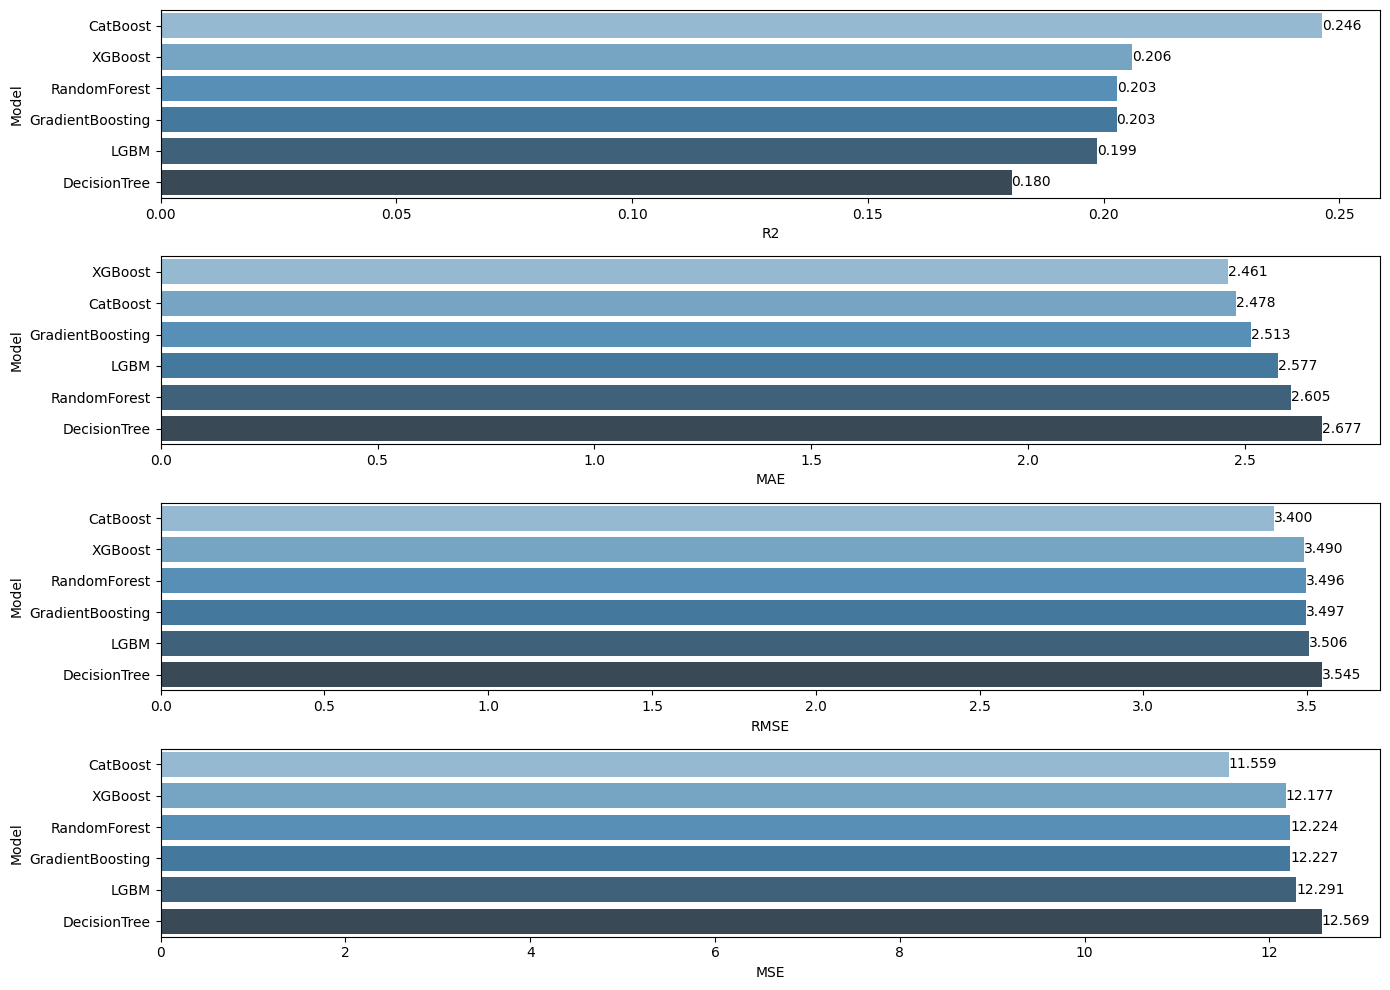

In [56]:
compare = pd.DataFrame({"Model": ["DecisionTree" , "RandomForest", "GradientBoosting",
                                 "XGBoost", "LGBM" , "CatBoost"],
                        "R2": [dt_r2, rf_r2 , gb_r2, xgb_r2, lgb_r2 , cb_r2],
                        "MAE": [dt_mae, rf_mae, gb_mae, xgb_mae, lgb_mae , cb_mae],
                        "RMSE": [dt_rmse , rf_rmse, gb_rmse, xgb_rmse, lgb_rmse , cb_rmse],
                        "MSE": [dt_mse , rf_mse, gb_mse, xgb_mse, lgb_mse , cb_mse],
                        })

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment

plt.figure(figsize=(14,10))
plt.subplot(411)
compare = compare.sort_values(by="R2", ascending=False)
ax=sns.barplot(x="R2", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="MAE", ascending=True)
ax=sns.barplot(x="MAE", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="RMSE", ascending=True)
ax=sns.barplot(x="RMSE", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(414)
compare = compare.sort_values(by="MSE", ascending=True)
ax=sns.barplot(x="MSE", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.tight_layout()  # Optional: Adjust subplot spacing
plt.show()

In [ ]:
# Done

### Ensemble Models

In [57]:
class Regressor:
    def __init__(self, n_estimators=2000, device="gpu", random_state=0):
        self.n_estimators = n_estimators
        self.device = device
        self.random_state = random_state
        self.models = self._define_model()
        self.models_name = list(self._define_model().keys())
        self.len_models = len(self.models)
        
    def _define_model(self):
        xgb_params = {
            'n_estimators': 4000,
            'learning_rate': 0.018, 
            'booster': 'gbtree',
            'reg_lambda': 3.5,  
            'reg_alpha': 1.25, 
            'subsample': 0.70,  
            'colsample_bytree': 0.898528184386095,
            'max_depth': 9,  
            'min_child_weight': 8,
            'eta': 0.018,  
            'gamma': 1.6661346939401E-07,
            'grow_policy': 'depthwise',  
            'n_jobs': -1,
            'objective': 'reg:absoluteerror',  
            'eval_metric': 'mae',
            'verbosity': 0,
            'random_state': self.random_state,
        }
            
        if self.device == 'gpu':
            xgb_params['tree_method'] = 'gpu_hist'
            xgb_params['predictor'] = 'gpu_predictor'
            
        
        lgb1_params = {
            'device'            : "gpu" if self.device else "cpu",
            'objective'         : 'regression_l1',
            'metric'            : 'mean_absolute_error',
            'boosting_type'     : 'gbdt',
            'random_state'      : self.random_state,
            'feature_fraction'  : 0.70,
            'learning_rate'     : 0.018,
            'max_depth'         : 16,
            'n_estimators'      : 50_000,
            'num_leaves'        : 80,                    
            'reg_alpha'         : 1.25,
            'reg_lambda'        : 3.5,
            'verbose'           : -1,
        }
        
        cat1_params = {
                    'task_type'           : "CPU",
                    'loss_function'       : 'MAE',
                    'eval_metric'         : 'MAE',
                    'bagging_temperature' : 2.5,
                    'colsample_bylevel'   : 0.8,
                    'iterations'          : 15_000,
                    'learning_rate'       : 0.067,
                    'od_wait'             : 40,
                    'max_depth'           : 9,
                    'l2_leaf_reg'         : 1.575,
                    'min_data_in_leaf'    : 28,
                    'random_strength'     : 0.55, 
                    'max_bin'             : 256,
                    # 'cat_features' : cat_cols
                           }
        
        hist_params = {
            'loss': 'absolute_error',
            'l2_regularization': 0.0104104133357932,
            'early_stopping': True,
            'learning_rate': 0.00627298859709192,
            'max_iter': 20000,
            'n_iter_no_change': 300,
            'max_depth': 16,
            'max_bins': 255,
            'min_samples_leaf': 54,
            'max_leaf_nodes':57,
            'random_state': self.random_state,
            #'categorical_features': []
        }
        
        models = {
#             "lad": LADRegression(),
            "xgb": XGBRegressor(**xgb_params),
            "lgb": LGBMRegressor(**lgb1_params),
            "cat": CatBoostRegressor(**cat1_params),
            # "rf": RandomForestRegressor(**rf_study.best_params),
            # "gb": GradientBoostingRegressor(**gb_study.best_params),
            # "xgb": xgb.XGBRegressor(**xgb_params),
            # "lgb": lgb.LGBMRegressor(**lgb1_params),
            # "cat": CatBoostRegressor(**cat1_params),
            # 'hgb': HistGradientBoostingRegressor(**hist_params),
            # "SVR_rbf": SVR(kernel="rbf", gamma="auto"),
#             "SVR_linear": SVR(kernel="linear", gamma="auto"),
#             "Ridge": RidgeCV(),
#             "Lasso": LassoCV(),
#             "KNeighborsRegressor": KNeighborsRegressor(n_neighbors=5, n_jobs=-1),            
            # "RandomForestRegressor": RandomForestRegressor(n_estimators=500, random_state=self.random_state, n_jobs=-1),
#             "SGDRegressor": SGDRegressor(max_iter=2000, early_stopping=True, n_iter_no_change=100, random_state=self.random_state),
            # "MLPRegressor": MLPRegressor(max_iter=500, early_stopping=True, n_iter_no_change=10, random_state=self.random_state),
#             "ExtraTreesRegressor": ExtraTreesRegressor(n_estimators=500, n_jobs=-1, random_state=self.random_state),
#             "PLSRegression": PLSRegression(n_components=10, max_iter=1000),
            #"PassiveAggressiveRegressor": PassiveAggressiveRegressor(max_iter=1000, tol=1e-3, random_state=self.random_state),
#             "TheilSenRegressor": TheilSenRegressor(max_iter=1000, random_state=self.random_state, n_jobs=-1),
            # "GradientBoostingRegressor": GradientBoostingRegressor(**gbd_params),
#             "ARDRegression": ARDRegression(n_iter=1000),
#             "HuberRegressor": HuberRegressor(max_iter=2000)
        }
        
        return models

# Optimizer --> Optimize MSE

In [58]:
from sklearn.metrics import mean_squared_error
import numpy as np
import optuna
from functools import partial

class OptunaWeights:
    def __init__(self, random_state, n_trials=100):
        self.study = None
        self.weights = None
        self.random_state = random_state
        self.n_trials = n_trials

    def _objective(self, trial, y_true, y_preds):
        # Define the weights for the predictions from each model
        weights = [trial.suggest_float(f"weight{n}", 1e-15, 1) for n in range(len(y_preds))]

        # Calculate the weighted prediction
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=weights)

        # Calculate the score for the weighted prediction
        score = mean_squared_error(y_true, np.round(weighted_pred))
        return score

    def fit(self, y_true, y_preds):
        optuna.logging.set_verbosity(optuna.logging.ERROR)
        sampler = optuna.samplers.CmaEsSampler(seed=self.random_state)
        pruner = optuna.pruners.HyperbandPruner()
        self.study = optuna.create_study(sampler=sampler, pruner=pruner, study_name="OptunaWeights", direction='minimize')
        objective_partial = partial(self._objective, y_true=y_true, y_preds=y_preds)
        self.study.optimize(objective_partial, n_trials=self.n_trials)
        self.weights = [self.study.best_params[f"weight{n}"] for n in range(len(y_preds))]

    def predict(self, y_preds):
        assert self.weights is not None, 'OptunaWeights error, must be fitted before predict'
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=self.weights)
        return weighted_pred

    def fit_predict(self, y_true, y_preds):
        self.fit(y_true, y_preds)
        return self.predict(y_preds)

    def get_weights(self):
        return self.weights

In [59]:
import random

# Settings
kfold = True
n_splits = 5 # 10
n_reapts = 1 # 1
random_state = 34 # Istanbul :)
n_estimators = 9999 # 99999
early_stopping_rounds = 500
n_trials = 2000 # 3000
verbose = False
device = 'gpu'

# Fix seed
random.seed(random_state)
random_state_list = random.sample(range(9999), n_reapts)

# To calculate runtime
def sec_to_minsec(t):
    min_ = int(t / 60)
    sec = int(t - min_*60)
    return min_, sec

In [60]:
import time
import gc
from copy import deepcopy

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

In [67]:
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Initialize an array for storing test predictions
regressor = Regressor(n_estimators, device, random_state)
# test_predss = np.zeros((X_test.shape[0]))
oof_predss = np.zeros((X.shape[0], n_reapts))
ensemble_score, ensemble_score_ = [], []
weights = []
trained_models = dict(zip([_ for _ in regressor.models_name if ('xgb' in _) or ('lgb' in _) or ('cat' in _)], [[] for _ in range(regressor.len_models)]))
score_dict = dict(zip(regressor.models_name, [[] for _ in range(regressor.len_models)]))

splitter = Splitter(kfold=kfold, n_splits=n_splits)
for i, (X_train_, X_val, y_train_, y_val, val_index) in enumerate(splitter.split_data(X, y, random_state_list=random_state_list)):
    n = i % n_splits
    m = i // n_splits

    # Get a set of regressor models
    regressor = Regressor(n_estimators, device, random_state_list[m])
    models = regressor.models

    # Initialize lists to store oof and test predictions for each base model
    oof_preds = []
    test_preds = []

    # Loop over each base model and fit it to the training data, evaluate on validation data, and store predictions
    for name, model in models.items():
        best_iteration = None
        start_time = time.time()
        if ('xgb' in name) or ('lgb' in name) or ('cat' in name):
            early_stopping_rounds_ = int(early_stopping_rounds*1.5) if name != 'cat' else early_stopping_rounds
            model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)], early_stopping_rounds=early_stopping_rounds_, verbose=verbose)
            best_iteration = model.best_iteration if name == 'xgb' else model.best_iteration_
        else:
            model.fit(X_train_, y_train_)
        end_time = time.time()
        min_, sec = sec_to_minsec(end_time - start_time)

        if name in trained_models.keys():
            trained_models[f'{name}'].append(deepcopy(model))

        # test_pred = model.predict(X_test).reshape(-1)
        y_val_pred = model.predict(X_val).reshape(-1)

        score = mean_squared_error(y_val, y_val_pred)  # Calculate MSE score instead of F1 score
        score_dict[name].append(score)
        print(f'{blu}{name}{res} [FOLD-{n} SEED-{random_state_list[m]}] MSE Score {blu}{score:.5f}{res} | Best iteration {blu}{best_iteration}{res} | {min_}min {sec}s')

        oof_preds.append(y_val_pred)
        # test_preds.append(test_pred)

    # Use Optuna to find the best ensemble weights
    optweights = OptunaWeights(random_state=random_state_list[m], n_trials=n_trials)
    y_val_pred = optweights.fit_predict(y_val.values, oof_preds)

    score = mean_squared_error(y_val, y_val_pred)  # Calculate MSE score instead of F1 score
    print(f'{red}>>> Ensemble{res} [FOLD-{n} SEED-{random_state_list[m]}] MSE Score {red}{score:.5f}{res}')
    print(f'{"-" * 60}')
    ensemble_score.append(score)
    weights.append(optweights.weights)

    # Predict to X_test by the best ensemble weights
    # test_predss += optweights.predict(test_preds) / (n_splits * len(random_state_list))
    oof_predss[X_val.index, m] += optweights.predict(oof_preds)

    gc.collect()

xgb [FOLD-0 SEED-8666] MSE Score 12.99072 | Best iteration 3 | 0min 2s
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
lgb [FOLD-0 SEED-8666] MSE Score 10.67620 | Best iteration 400 | 0min 1s
cat [FOLD-0 SEED-8666] MSE Score 11.22083 | Best iteration 71 | 0min 0s
>>> Ensemble [FOLD-0 SEED-8666] MSE Score 10.59737
------------------------------------------------------------
xgb [FOLD-1 SEED-8666] MSE Score 16.18569 | Best iteration 0 | 0min 2s
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
lgb [FOLD-1 SEED-8666] MSE Score 13.83405 | Best iteration 325 | 0min 1s
cat [FOLD-1 SEED-8666] MSE Score 12.95575 | Best iteration 114 | 0min 1s
>>> Ensemble [FOLD-1 SEED-8666] MSE Score 13.01071
------------------------------------------------------------
xgb [FOLD-2 SEED-8666] MSE Score 6.99638 | Best iteration 0 | 0min 2s
[LightGBM] [Warning] feat

# Mean Scores Each Model

--- Mean MSE Scores---
xgb: 10.81590 ± 3.41242
lgb: 9.05032 ± 2.92414
cat: 9.14460 ± 2.59073


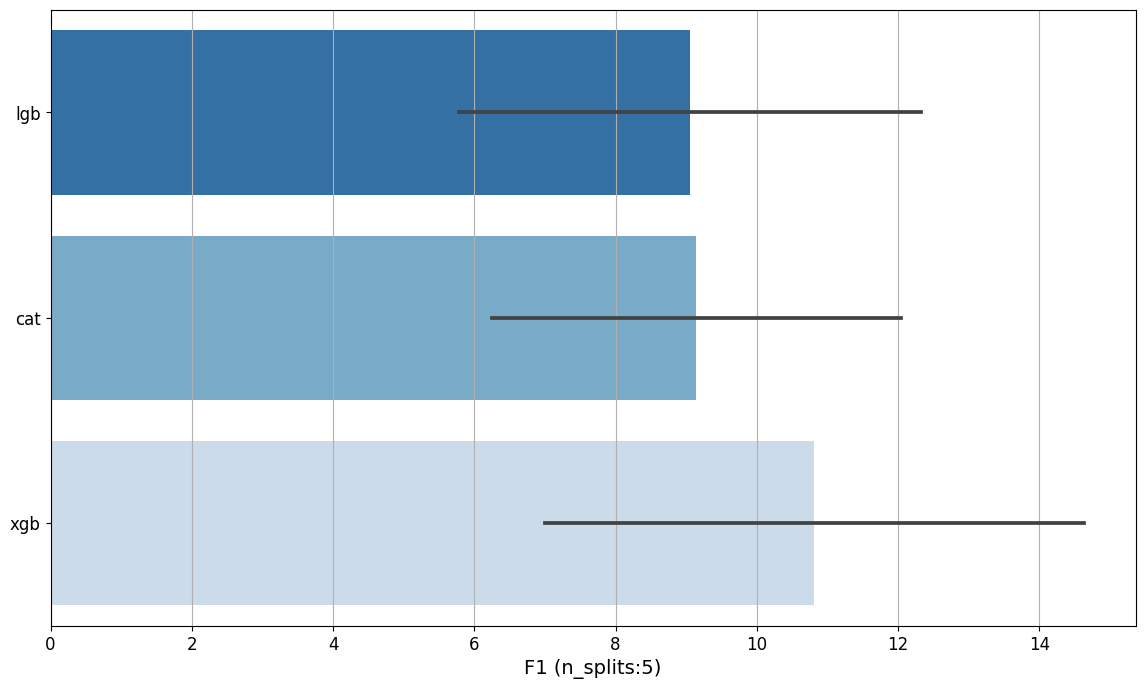

In [68]:
def plot_score_from_dict(score_dict, title='MAE', ascending=True):
    score_df = pd.melt(pd.DataFrame(score_dict))
    score_df = score_df.sort_values('value', ascending=ascending)
    
    plt.figure(figsize=(14, 8))
    sns.barplot(x='value', y='variable', data=score_df, palette='Blues_r', errorbar='sd')
    plt.xlabel(f'{title}', fontsize=14)
    plt.ylabel('')
    #plt.title(f'{title}', fontsize=18)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, axis='x')

    plt.show()

print('--- Mean MSE Scores---')    
for name, score in score_dict.items():
    mean_score = np.mean(score)
    std_score = np.std(score)
    print(f'{name}: {red}{mean_score:.5f} ± {std_score:.5f}{res}')
plot_score_from_dict(score_dict, title=f'F1 (n_splits:{n_splits})')

Mean Optuna Ensemble MSE 8.80748 ± 2.70627

--- Optuna Weights---
xgb: 0.23839 ± 0.12994
lgb: 0.59918 ± 0.30305
cat: 0.47097 ± 0.27847


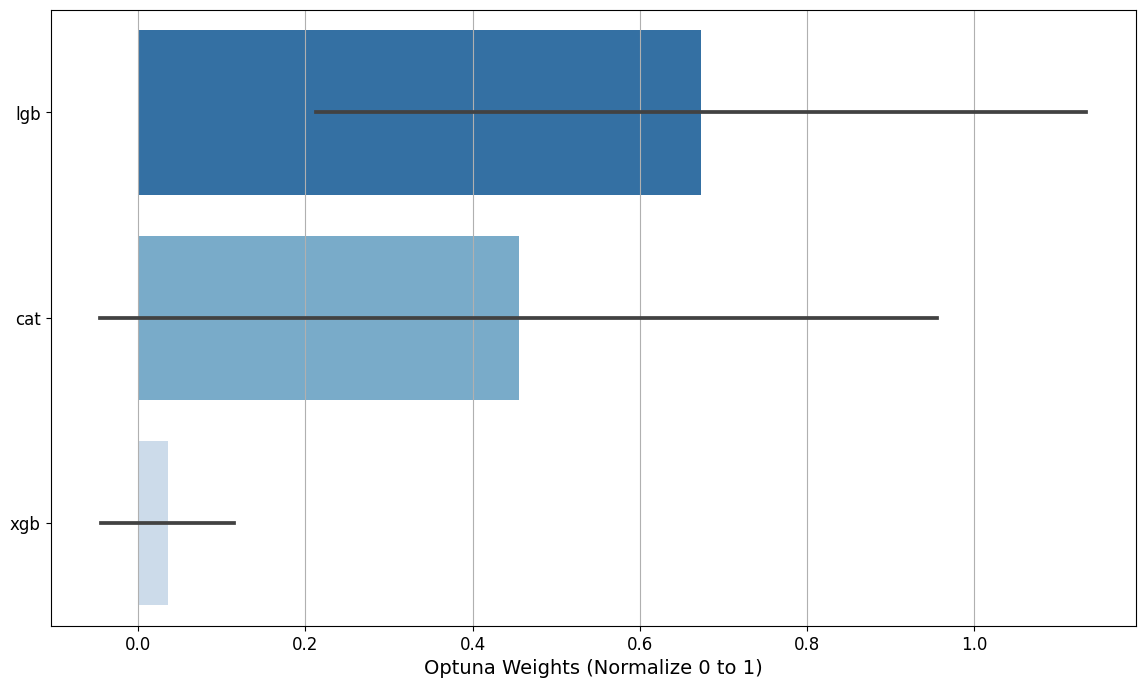

In [69]:
# Calculate the mean LogLoss score of the ensemble
mean_score = np.mean(ensemble_score)
std_score = np.std(ensemble_score)
print(f'{red}Mean{res} Optuna Ensemble MSE {red}{mean_score:.5f} ± {std_score:.5f}{res}')

print('')
# Print the mean and standard deviation of the ensemble weights for each model
print('--- Optuna Weights---')
mean_weights = np.mean(weights, axis=0)
std_weights = np.std(weights, axis=0)
for name, mean_weight, std_weight in zip(models.keys(), mean_weights, std_weights):
    print(f'{name}: {blu}{mean_weight:.5f} ± {std_weight:.5f}{res}')

# weight_dict = dict(zip(list(score_dict.keys()), np.array(weights).T.tolist()))
# plot_score_from_dict(weight_dict, title='Model Weights', ascending=False)
normalize = [((weight - np.min(weight)) / (np.max(weight) - np.min(weight))).tolist() for weight in weights]
weight_dict = dict(zip(list(score_dict.keys()), np.array(normalize).T.tolist()))
plot_score_from_dict(weight_dict, title='Optuna Weights (Normalize 0 to 1)', ascending=False)

In [ ]:
# Ensemble Model better again.